# Plotting species distribution areas (IUCN spatial data)

## Imports

### Libraries

In [1]:
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

%matplotlib inline

### Data
First, let's load the shapefile containing the distribution data for marine mammals (IUCN data).

In [2]:
shp = gpd.read_file('./MARINE_MAMMALS/MARINE_MAMMALS.shp')
#shore = gpd.read_file('shapefile.shp') # In case you want a custom coastline
#shp.head()

## Custom Functions

In [3]:
def RGB(rgb_code):
    """Transforms 0-255 rgb colors to 0-1 scale"""
    col = tuple(x/255 for x in rgb_code) # I'm shure there is a more efficient way; however, it was faster to code a simple function
    return col

In [4]:
def get_ranges(species, shp, drop_columns = None):
    """Returns a list of simplifyied distribution data from a shape downloaded from the IUCN. 
       Arguments:
       species: a list of binomial species names to get the distributions from
       shp: the shapefile variable containing the distribution ranges
       drop_columns: Columns with attributes to drop from the original shapefile, if None, no columns are dropped"""

    if drop_columns == None:
        for sp in species:
            if sp == species[0]:
                ranges = shp[shp.binomial == sp]
            else:
                ranges = ranges.append(shp[shp.binomial == sp])
    else:
        shp = shp.drop(columns = drop_columns)
        for sp in species:
            if sp == species[0]:
                ranges = shp[shp.binomial == sp]
            else:
                ranges = ranges.append(shp[shp.binomial == sp])   
    return ranges

In [5]:
def plot_dist_ranges(ranges, cmap = 'winter', font = {'family': 'sans-serif', 'weight': 500}, shore = None, extent = None):
    """Plots the distribution ranges of the species contained in the ranges variable.
        Arguments:
        ranges: A list in which each element corresponds to a distribution range (geometry) and attributes from distribution data downloadaded from the IUCN
        cmap: A string defining the colormap to use. If empty, defaults to 'winter'
        font: Dict. containing the properties of the font to use in the plot.
        shore: Variable storing the coastline. If None, defaults to 'naturalearth_lowres' from the geopandas datasets
        extent: A list with the limits of the plot, in the form: [x_inf, x_sup, y_inf, y_sup]. If none, the whole globe is plotted."""
    # Setting the font of the plot. 
    plt.rcParams['font.family'] = font['family']
    plt.rcParams['font.weight'] = font['weight']
    
    # Plot environment
    fig, ax = plt.subplots(1,1)
    
    # Plotting the distributions
    sp = list(ranges.binomial.values)
    ranges.plot(column = 'binomial', ax = ax, alpha = 0.35, cmap = cmap,
                legend = True,
                legend_kwds = {'prop': {'style': 'italic', 'size': 8}})
            
    # Plotting the coastline
    if shore == None:
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        world.plot(color = 'lightslategray', alpha = 0.5, ax = ax)
    else:
        shore.plot(color = 'lightslategray', alpha = 0.5, ax = ax)
    
    # Cleaning the plot
    plt.tight_layout()
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.tick_params(axis        = 'both',
                   which       = 'both',
                   bottom      = False,
                   top         = False,
                   left        = False,
                   labelleft   = True,
                   labelbottom = True)
    
    # Changing the tickmarks of the y axis
    if extent == None:
        extent = [-180, 180, -90, 90]
        plt.axis(extent)
        plt.yticks(np.arange(-80,120,40))
    else:
        long_range = abs(extent[0] - extent[1])/4
        plt.yticks(np.linspace(extent[0], extent[1], 4))
    
    # Changing the axes labels
    plt.xlabel('Longitude (º)')
    plt.ylabel('Latitude (º)')
    #plt.labelweight = font['weight']

## Extracting and plotting the data
As an example, the distributions of *Stenella attenuata* and *Stenella longirostris* are plotted, and most unused columns are dropped. Also, a custom color map is created to pass to the plotting function.

In [6]:
from matplotlib.colors import ListedColormap
species = ['Stenella attenuata', 'Stenella longirostris']
drop_columns = ['id_no','presence', 'origin', 'source', 'seasonal', 'compiler', 'yrcompiled',
                'citation', 'dist_comm', 'island', 'subspecies', 'subpop', 'tax_comm', 'kingdom',
                'phylum', 'class', 'order_', 'family', 'genus', 'category', 'marine', 'terrestial', 'freshwater']
ranges = get_ranges(species, shp, drop_columns)
cmap = ListedColormap([RGB((121,227,249)), RGB((27,109,183))])

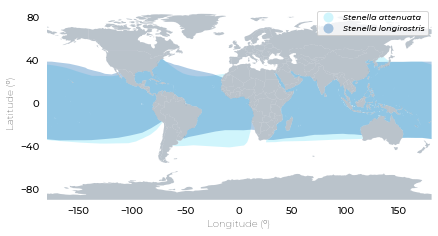

In [7]:
plot_dist_ranges(ranges, cmap = cmap, font = {'family': 'Montserrat', 'weight': 500})

In [8]:
#plt.savefig('Dist.jpg', bbox_inches = 'tight', pad_inches = 0.1, transparent = False, dpi = 300)